In [27]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## maps back from rgb image to height

In [44]:
height_df = pd.read_csv("height.csv",header=None)
height_df

,0
0,0.994892
1,0.613472
2,0.741804
3,0.635291
4,0.475018
5,0.672688
6,0.868175
7,0.602864
8,0.526977
9,0.589624


In [11]:
height_5_res = [176.12, 238.65, 186.31, 165.94, 130.29]
height_df = pd.DataFrame(height_5_res, columns=['height'])
height_df['height'] = height_df['height']/255
height_df

,height
0,0.690667
1,0.935882
2,0.730627
3,0.650745
4,0.510941


In [12]:
df = pd.read_excel('../results/input.xlsx')
df.replace('<null>', np.nan, inplace=True)
df['height'] = df['height'].astype(float)
df['greyscale'] = df['greyscale'].astype(float)
df = df.dropna()
df

,height,greyscale
0,9.0,0.423176
1,9.0,0.423176
2,10.0,0.453389
3,9.0,0.423176
4,11.0,0.481010
...,...,...
2801,6.0,0.312177
2802,8.0,0.389947
2803,10.0,0.453389
2804,9.0,0.423176


<AxesSubplot: xlabel='height', ylabel='greyscale'>

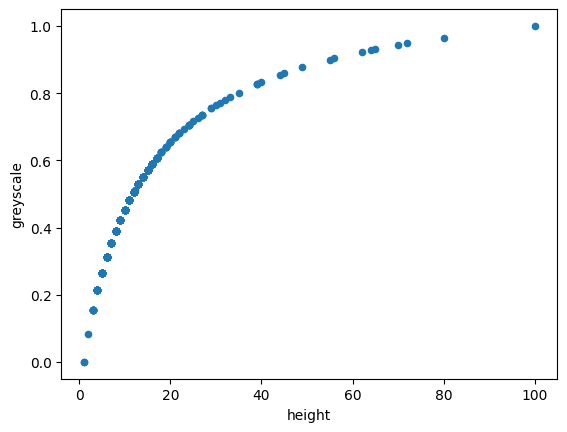

In [13]:
df.plot(x='height', y='greyscale', kind='scatter')

0    0.690667
1    0.935882
2    0.730627
3    0.650745
4    0.510941
Name: height, dtype: float64
[22.66481193 67.47076681 26.18707974 19.72292659 12.19607053]


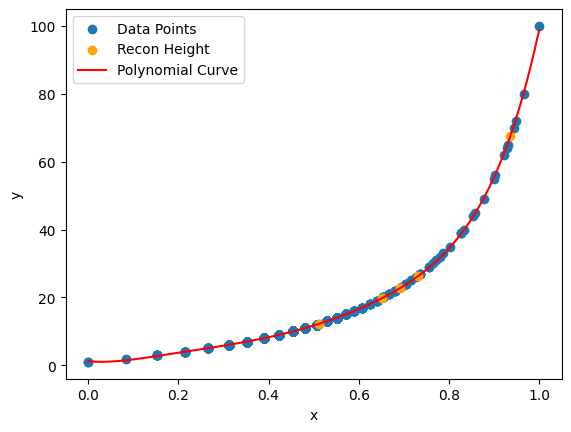

In [15]:
y = df['height']
x = df['greyscale']
# Fit a polynomial curve of degree 2
degree = 6
coefficients = np.polyfit(x, y, degree)
poly = np.poly1d(coefficients)

# Generate x values for the curve
x_curve = np.linspace(x.min(), x.max(), 100)

# Calculate y values for the curve
y_curve = poly(x_curve)

# reconstructed height 
x_height = height_df['height']
y_height = poly(x_height)
print(x_height)
print(y_height)
# Plot the original points and the fitted curve
plt.scatter(x, y, label='Data Points')
plt.scatter(x_height, y_height, label='Recon Height', color = 'orange')
plt.plot(x_curve, y_curve, color='r', label='Polynomial Curve')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

In [16]:
height_df

,height
0,0.690667
1,0.935882
2,0.730627
3,0.650745
4,0.510941


In [17]:
height_df['height_real']=y_height
height_df

,height,height_real
0,0.690667,22.664812
1,0.935882,67.470767
2,0.730627,26.187080
3,0.650745,19.722927
4,0.510941,12.196071


In [19]:
height_df.to_csv('../results/height_new_res.csv')

## cluster indexes

In [29]:
folder_path = '../results/'  # Replace with the path to your folder
keyword = '5cluster'
csv_files = [file for file in os.listdir(folder_path) if file.endswith('.csv') and keyword in file]
csv_files

['5cluster0_739.csv',
 '5cluster1_216.csv',
 '5cluster2_959.csv',
 '5cluster3_22.csv',
 '5cluster4_251.csv']

In [31]:
df_index = pd.DataFrame()
dfs = []
for csv_file in csv_files:
    print(csv_file)
    df = pd.DataFrame()
    df = pd.read_csv(os.path.join(folder_path, csv_file))
    index = csv_file.split('.')[0].split("_")[1]
    df[str(index)] = df['data'].apply(lambda x: x.split('/')[-1].split('.')[0])
    dfs.append(df[str(index)])
df_index = pd.concat(dfs, axis=1)
df_index

5cluster0_739.csv
5cluster1_216.csv
5cluster2_959.csv
5cluster3_22.csv
5cluster4_251.csv


,739,216,959,22,251
0,1013,0,1,10,1011
1,103,100,1000,1001,1012
2,104,1003,1002,1006,1020
3,105,1005,1004,1007,1026
4,1051,102,1009,1008,1027
...,...,...,...,...,...
637,NaN,NaN,NaN,99,NaN
638,NaN,NaN,NaN,992,NaN
639,NaN,NaN,NaN,994,NaN
640,NaN,NaN,NaN,995,NaN


In [32]:
df_index.to_csv(keyword+'_index.csv', index=False)

## calculate area in each cluster

In [33]:
index_list = pd.read_csv('../notebooks/5cluster_index.csv')
index_list.replace(2139, np.nan, inplace=True)
index_list

,739,216,959,22,251
0,1013.0,0.0,1.0,10,1011.0
1,103.0,100.0,1000.0,1001,1012.0
2,104.0,1003.0,1002.0,1006,1020.0
3,105.0,1005.0,1004.0,1007,1026.0
4,1051.0,102.0,1009.0,1008,1027.0
...,...,...,...,...,...
637,NaN,NaN,NaN,99,NaN
638,NaN,NaN,NaN,992,NaN
639,NaN,NaN,NaN,994,NaN
640,NaN,NaN,NaN,995,NaN


In [34]:
area = pd.read_excel('../notebooks/area.xlsx',header=None)
area

,0
0,3366.392977
1,295.810309
2,288.367909
3,282.979150
4,396.475560
...,...
2134,281.051084
2135,289.579605
2136,210.062691
2137,135.779337


In [35]:
summed_values = pd.DataFrame()

for column in index_list.columns:
    indices = index_list[column].dropna().astype(int)
    summed_values[column] = area.loc[indices].sum()
summed_values

,739,216,959,22,251
0,627655.141361,98572.344724,219424.375902,331440.762869,232987.859989


In [1]:
627655.141361+98572.344724+219424.375902+331440.762869+232987.859989

1510080.484845